In [197]:
library("ape")
library("phytools")
library(seqinr)
library(RColorBrewer)
library(dplyr)
library('ggplot2')
library('ggtree')
library(tidytree)
library(ggnewscale)

In [198]:
setwd('.')
meta <- read.table('final.csv',sep=',',
                      header=TRUE,row.names=1)
meta[] <- lapply(meta, as.character)
#meta
tree <- read.tree('results_mtb/tree.newick')
tree<-drop.tip(tree,'ref')

In [199]:
gettreedata <- function(tree, meta){
    d<-meta[row.names(meta) %in% tree$tip.label,]
    d$label <- row.names(d)
    y <- full_join(as_tibble(tree), d, by='label')
    y <- as.treedata(y)
    return(y)
}

ggplottree <- function(tree, meta, col1, col2=NULL, col3=NULL, layout="rectangular", cmap='Set1', title='') {
    y <- gettreedata(tree, meta)
    
    p <- ggtree(y, layout=layout)
    p1 <- p +  scale_color_brewer(palette=cmap) + 
          geom_tippoint(mapping=aes( shape=NULL, color=.data[[col1]]),size=4) +
          geom_tiplab(size=6, fontsize=10, offset=5,mapping=aes(label=strain))
    if (is.null(col2)){        
        p2<-p1
    }
    else {
        df<-meta[tree$tip.label,][col2]
        p2 <- gheatmap(p1, df, offset=140, width=.05,
                  colnames_angle=0, colnames_offset_y = .15) 
    }  
    if (is.null(col3)){        
        p2<-p2
    }
    else {
        df<-meta[tree$tip.label,][col3]
        p2 <- gheatmap(p2, df, offset=200, width=.05,
                  colnames_angle=0, colnames_offset_y = .15) 
    }     
    
    p2 <- p2 + theme_tree2(legend.text = element_text(size=25), legend.key.size = unit(1, 'cm'), 
                        legend.position="right", plot.title = element_text(size=30)) +
            #guides(color = guide_legend(override.aes = list(size=10))) +
            ggtitle(title)
    
    return(p2)
}

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



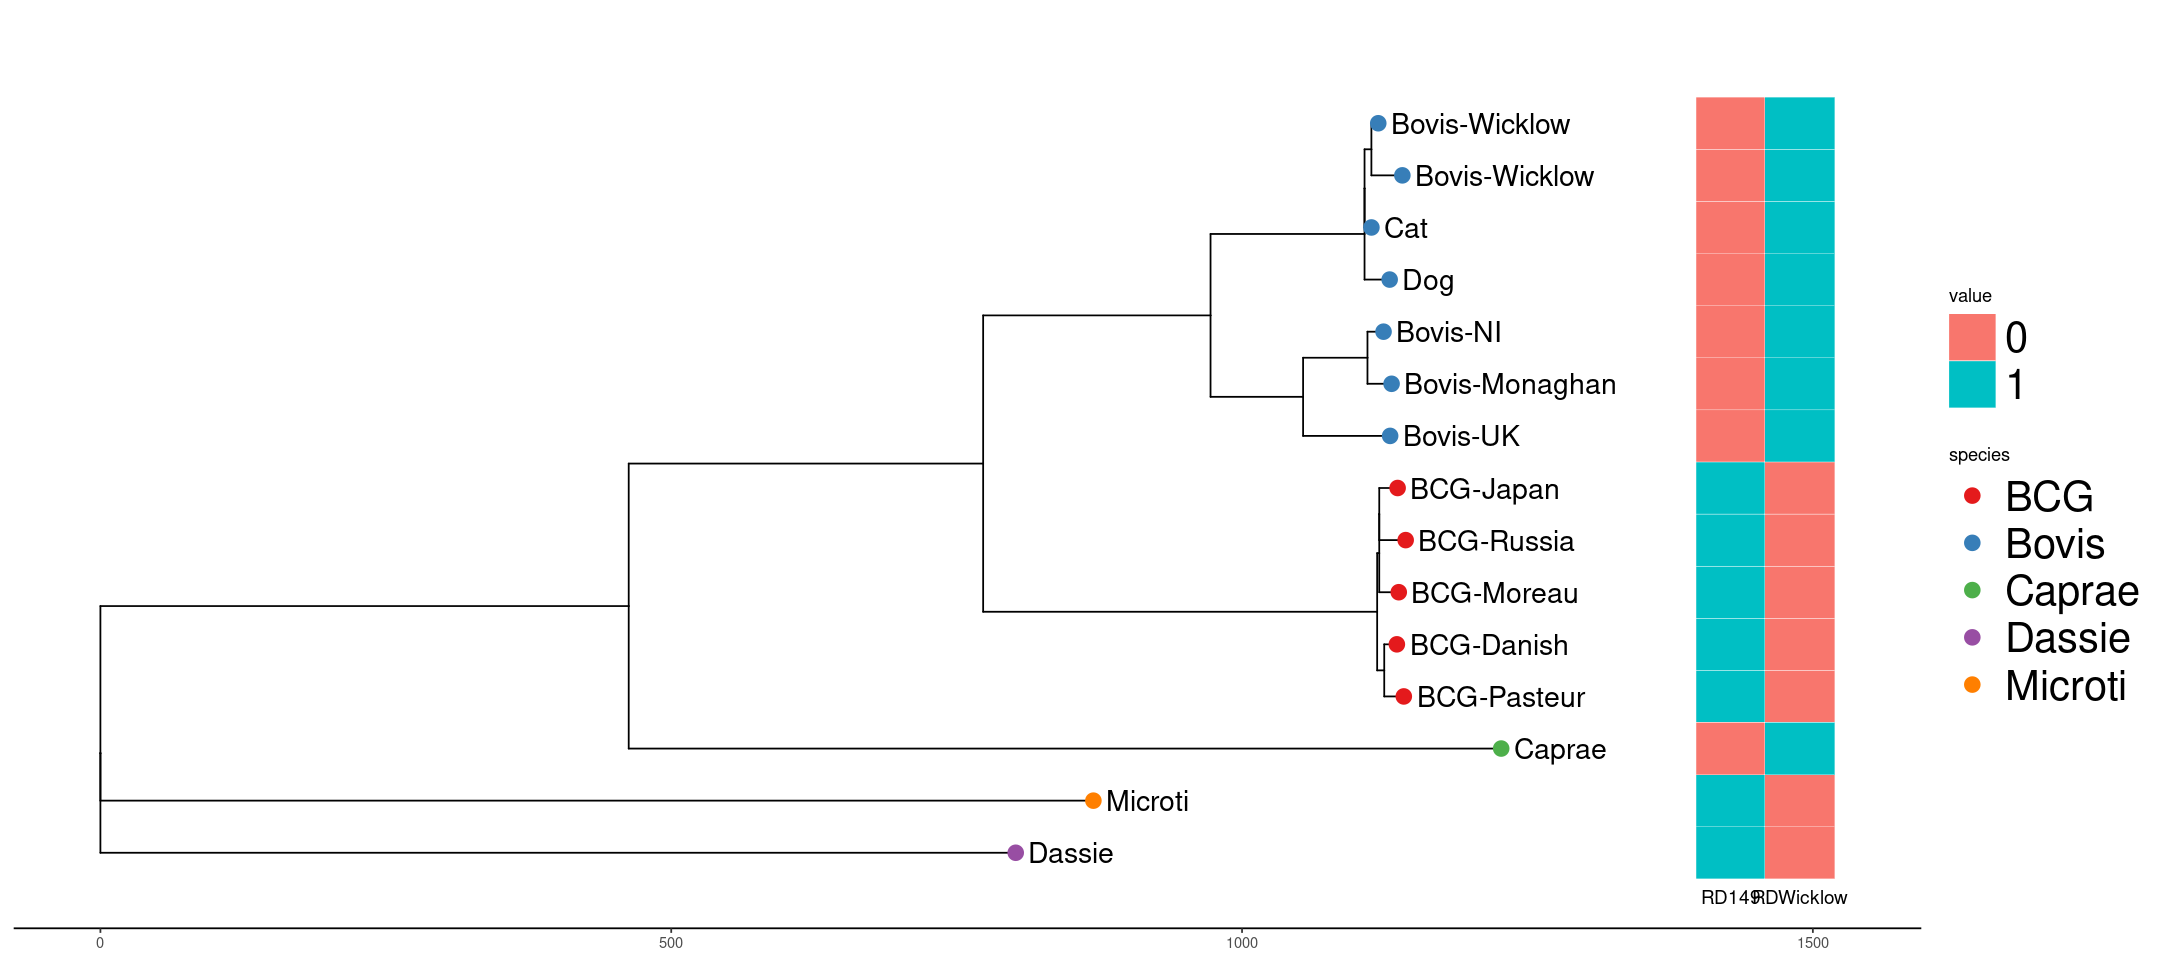

In [200]:
options(repr.plot.width=18, repr.plot.height=8)
ggplottree(tree, meta, layout='rect','species','RD149','RDWicklow')